# Chronic Kidney Disease Prediction

In [19]:
import sklearn
from sklearn.datasets import make_classification
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report ,accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import matplotlib as mp
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np
import pandas as pd
import re

df = pd.read_csv('C:\\Users\SHAD\Downloads\processed_kidney_data_set.csv')
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)
# from google.colab import drive
# drive.mount('/content/drive')

In [20]:
# #df=df.replace('[^\d.]','',regex=True).astypey(float)
# v= lambda x:float(x[1:-1])
# df.htn=df.htn.apply(v)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 37 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          400 non-null    int64  
 1   scaled_age   400 non-null    float64
 2   bp           400 non-null    float64
 3   scaled_bp    400 non-null    float64
 4   sg           400 non-null    float64
 5   al           400 non-null    float64
 6   scaled_al    400 non-null    float64
 7   su           400 non-null    float64
 8   scaled_su    400 non-null    float64
 9   rbc          400 non-null    float64
 10  scaled_rbc   400 non-null    float64
 11  pc           400 non-null    float64
 12  pcc          400 non-null    float64
 13  ba           400 non-null    float64
 14  bgr          400 non-null    float64
 15  scaled_bgr   400 non-null    float64
 16  bu           400 non-null    float64
 17  scaled_bu    400 non-null    float64
 18  sc           400 non-null    float64
 19  scaled_s

In [22]:
print(df.shape)

(400, 37)


In [23]:
df.mean()


age              51.440000
scaled_age        0.562075
bp               76.391075
scaled_bp         0.202275
sg                1.017360
al                1.016955
scaled_al         0.203000
su                0.450125
scaled_su         0.090025
rbc               0.810300
scaled_rbc        0.810300
pc                0.773113
pcc               0.106060
ba                0.055560
bgr             148.036570
scaled_bgr        0.269375
bu               57.425735
scaled_bu         0.143100
sc                3.072435
scaled_sc         0.035500
sod             137.528808
scaled_sod        0.839025
pot               4.627190
hemo             12.526380
scaled_hemo       0.641100
pcv              38.884410
scaled_pcv        0.663700
wbc            8406.122330
scaled_wbc        0.257525
rbcc              4.707293
htn               0.369345
dm                0.344220
cad               0.085425
appet             0.794485
pe                0.190475
ane               0.150375
class             0.625000
d

In [24]:
df.min()

age               2.000
scaled_age        0.000
bp               50.000
scaled_bp         0.000
sg                1.005
al                0.000
scaled_al         0.000
su                0.000
scaled_su         0.000
rbc               0.000
scaled_rbc        0.000
pc                0.000
pcc               0.000
ba                0.000
bgr              22.000
scaled_bgr        0.000
bu                1.500
scaled_bu         0.000
sc                0.400
scaled_sc         0.000
sod               4.500
scaled_sod        0.000
pot               2.500
hemo              3.100
scaled_hemo       0.000
pcv               9.000
scaled_pcv        0.000
wbc            2200.000
scaled_wbc        0.000
rbcc              2.100
htn               0.000
dm                0.000
cad               0.000
appet             0.000
pe                0.000
ane               0.000
class             0.000
dtype: float64

In [25]:
df.isnull().sum()

age            0
scaled_age     0
bp             0
scaled_bp      0
sg             0
al             0
scaled_al      0
su             0
scaled_su      0
rbc            0
scaled_rbc     0
pc             0
pcc            0
ba             0
bgr            0
scaled_bgr     0
bu             0
scaled_bu      0
sc             0
scaled_sc      0
sod            0
scaled_sod     0
pot            0
hemo           0
scaled_hemo    0
pcv            0
scaled_pcv     0
wbc            0
scaled_wbc     0
rbcc           0
htn            0
dm             0
cad            0
appet          0
pe             0
ane            0
class          0
dtype: int64

In [26]:
df.isin(['	?']).sum() #data which includes the '?' sign

age            0
scaled_age     0
bp             0
scaled_bp      0
sg             0
al             0
scaled_al      0
su             0
scaled_su      0
rbc            0
scaled_rbc     0
pc             0
pcc            0
ba             0
bgr            0
scaled_bgr     0
bu             0
scaled_bu      0
sc             0
scaled_sc      0
sod            0
scaled_sod     0
pot            0
hemo           0
scaled_hemo    0
pcv            0
scaled_pcv     0
wbc            0
scaled_wbc     0
rbcc           0
htn            0
dm             0
cad            0
appet          0
pe             0
ane            0
class          0
dtype: int64

In [27]:
df.isin(['	?']).sum() #data which includes the '?' sign

age            0
scaled_age     0
bp             0
scaled_bp      0
sg             0
al             0
scaled_al      0
su             0
scaled_su      0
rbc            0
scaled_rbc     0
pc             0
pcc            0
ba             0
bgr            0
scaled_bgr     0
bu             0
scaled_bu      0
sc             0
scaled_sc      0
sod            0
scaled_sod     0
pot            0
hemo           0
scaled_hemo    0
pcv            0
scaled_pcv     0
wbc            0
scaled_wbc     0
rbcc           0
htn            0
dm             0
cad            0
appet          0
pe             0
ane            0
class          0
dtype: int64

In [28]:
new_df=df.drop(columns=['age','bp','sg','al','su','rbc','bgr','bu','sc','sod','hemo','pcv','wbc','class'])



array([[<AxesSubplot:title={'center':'scaled_age'}>,
        <AxesSubplot:title={'center':'scaled_bp'}>,
        <AxesSubplot:title={'center':'scaled_al'}>,
        <AxesSubplot:title={'center':'scaled_su'}>,
        <AxesSubplot:title={'center':'scaled_rbc'}>],
       [<AxesSubplot:title={'center':'pc'}>,
        <AxesSubplot:title={'center':'pcc'}>,
        <AxesSubplot:title={'center':'ba'}>,
        <AxesSubplot:title={'center':'scaled_bgr'}>,
        <AxesSubplot:title={'center':'scaled_bu'}>],
       [<AxesSubplot:title={'center':'scaled_sc'}>,
        <AxesSubplot:title={'center':'scaled_sod'}>,
        <AxesSubplot:title={'center':'pot'}>,
        <AxesSubplot:title={'center':'scaled_hemo'}>,
        <AxesSubplot:title={'center':'scaled_pcv'}>],
       [<AxesSubplot:title={'center':'scaled_wbc'}>,
        <AxesSubplot:title={'center':'rbcc'}>,
        <AxesSubplot:title={'center':'htn'}>,
        <AxesSubplot:title={'center':'dm'}>,
        <AxesSubplot:title={'center':'cad'}>]

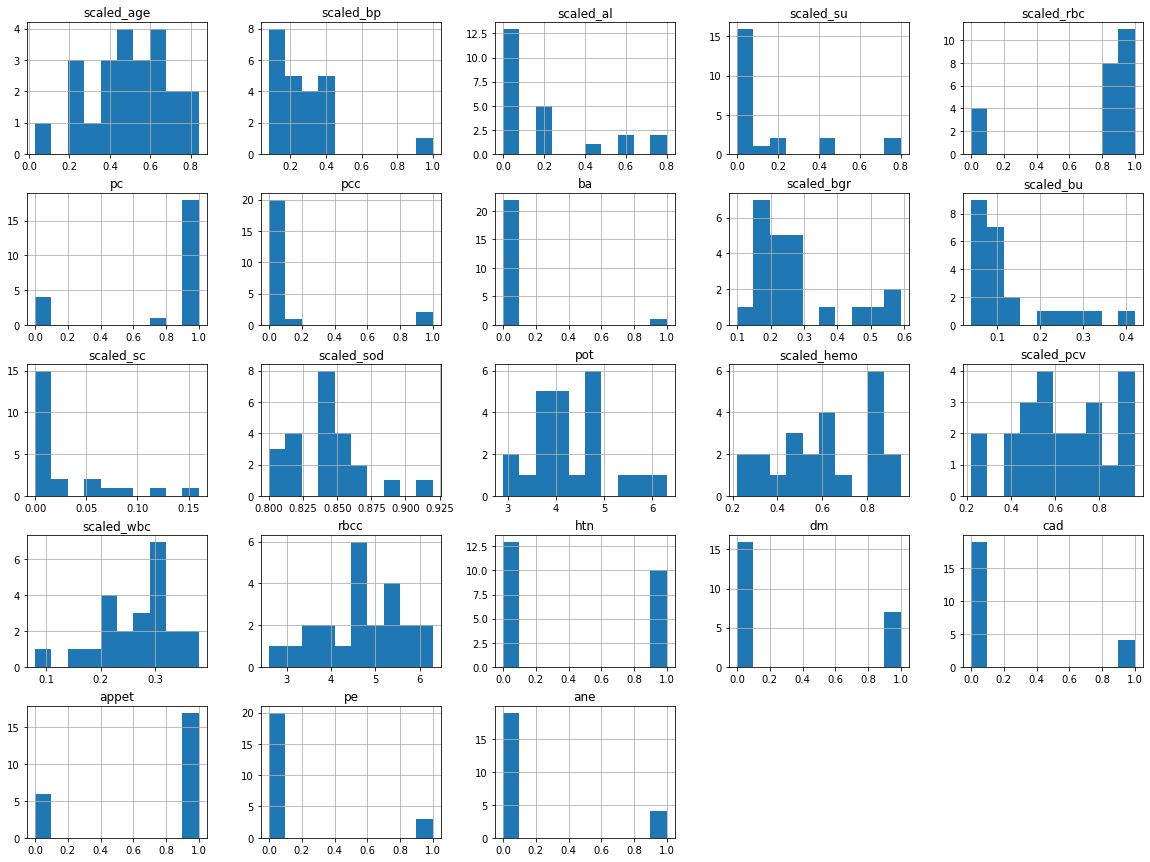

In [29]:
new_df.iloc[1:24].hist(xlabelsize=10,ylabelsize=10,figsize=(20,15)) #Histogram

In [30]:
df.dtypes

age              int64
scaled_age     float64
bp             float64
scaled_bp      float64
sg             float64
al             float64
scaled_al      float64
su             float64
scaled_su      float64
rbc            float64
scaled_rbc     float64
pc             float64
pcc            float64
ba             float64
bgr            float64
scaled_bgr     float64
bu             float64
scaled_bu      float64
sc             float64
scaled_sc      float64
sod            float64
scaled_sod     float64
pot            float64
hemo           float64
scaled_hemo    float64
pcv            float64
scaled_pcv     float64
wbc            float64
scaled_wbc     float64
rbcc           float64
htn            float64
dm             float64
cad            float64
appet          float64
pe             float64
ane            float64
class            int64
dtype: object

In [163]:

!pip install plotly
import plotly  
import plotly.express as px
fig = px.sunburst(df,path=['scaled_age','scaled_bp','scaled_al','scaled_su','scaled_rbc','scaled_bgr','scaled_bu','scaled_sc','scaled_sod','scaled_hemo','scaled_pcv'],values='class',height=1000, width=1000)

fig.show()

  Created wheel for retrying: filename=retrying-1.3.3-py3-none-any.whl size=11434 sha256=b0bc98925bb31c92d087bfa72946c00da2093eb135c02167fba4873319a8c2e2
  Stored in directory: c:\users\shad\appdata\local\pip\cache\wheels\c4\a7\48\0a434133f6d56e878ca511c0e6c38326907c0792f67b476e56
Successfully built retrying


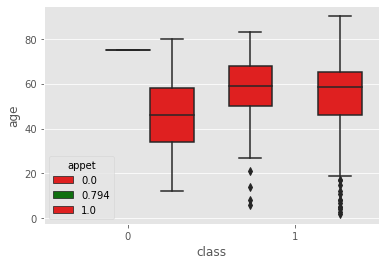

In [164]:
import seaborn as sns

pal = ['red', 'green']
g= sns.boxplot(x="class", y="age", data=df, hue='appet', palette=pal) 

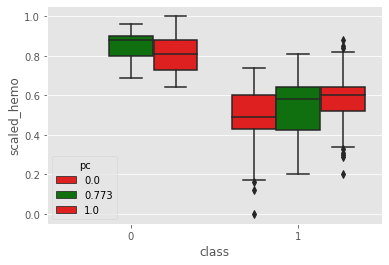

In [169]:
import seaborn as sns

pal = ['red', 'green']
g= sns.boxplot(x="class", y="scaled_hemo", data=df, hue='pc', palette=pal) 

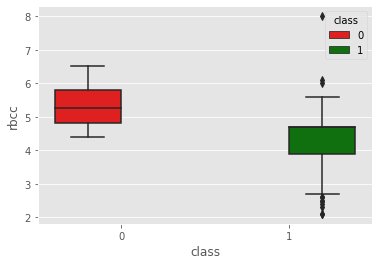

In [177]:
import seaborn as sns

pal = ['red', 'green']
g= sns.boxplot(x="class", y="rbcc", data=df, hue='class', palette=pal) 

In [160]:
from sklearn.model_selection import train_test_split

y = df['class']

#X = df.drop(columns = 'class')
X=df.drop(columns=['age','bp','sg','al','su','rbc','bgr','bu','sc','sod','hemo','pcv','wbc','class'])
#X=df.drop(columns=['scaled_age','scaled_bp','scaled_al','scaled_su','scaled_rbc','scaled_bgr','scaled_bu','scaled_sc','scaled_sod','scaled_hemo','scaled_pcv','scaled_wbc','class'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [32]:
X_train

scaled_age  scaled_bp  scaled_al  scaled_su  scaled_rbc     pc  pcc   ba  \
3          0.57       0.23        0.0       0.00        1.00  1.000  0.0  0.0   
18         0.65       0.38        0.8       0.40        1.00  1.000  0.0  0.0   
202        0.77       0.15        0.2       0.00        1.00  0.773  1.0  1.0   
250        0.36       0.15        0.2       0.09        0.81  0.773  0.0  0.0   
274        0.11       0.08        0.6       0.00        0.00  0.000  1.0  0.0   
..          ...        ...        ...        ...         ...    ...  ...  ...   
71         0.60       0.31        0.2       0.09        0.81  0.773  0.0  0.0   
106        0.67       0.23        0.4       0.00        0.00  0.000  0.0  0.0   
270        0.59       0.08        0.6       0.09        0.81  0.773  0.0  0.0   
348        0.63       0.23        0.0       0.00        1.00  1.000  0.0  0.0   
102        0.38       0.08        0.0       0.00        1.00  1.000  0.0  0.0   

     scaled_bgr  scaled_bu  ...  scaled_hemo  scaled_pcv  scaled_wbc   rbcc  \
3          0.16       0.06  ...         0.81        0.96        0.17  5.300   
18         0.50       0.34  ...         0.29        0.24        0.31  3.900   
202        0.32       0.39  ...         0.64        0.66        0.26  4.707   
250        0.27       0.56  ...         0.20        0.66        0.26  4.707   
274        0.27       0.13  ...         0.61        0.66        0.33  4.707   
..          ...        ...  ...          ...         ...         ...    ...   
71         0.26       0.22  ...         0.64        0.66        0.26  4.707   
106        0.32       0.38  ...         0.31        0.33        0.29  3.200   
270        0.22       0.05  ...         0.81        0.82        0.26  4.707   
348        0.21       0.04  ...         0.84        0.73        0.17  6.200   
102        0.18       0.10  ...         0.79        0.76        0.15  6.200   

     htn   dm  cad  appet   pe  ane  
3    0.0  0.0  0.0    1.0  0.0  0.0  
18   1.0  1.0  1.0    1.0  0.0  1.0  
202  0.0  1.0  0.0    0.0  0.0  0.0  
250  1.0  0.0  0.0    1.0  0.0  1.0  
274  0.0  0.0  0.0    1.0  0.0  0.0  
..   ...  ...  ...    ...  ...  ...  
71   1.0  1.0  0.0    0.0  1.0  0.0  
106  1.0  1.0  1.0    0.0  1.0  1.0  
270  1.0  1.0  0.0    1.0  1.0  0.0  
348  0.0  0.0  0.0    1.0  0.0  0.0  
102  0.0  0.0  0.0    1.0  0.0  0.0  

[320 rows x 23 columns]

In [33]:
X_train.to_csv("XTrain.csv")
X_test.to_csv('XTest.csv')

In [34]:
# x=df.drop('age','bp','sg','al','su','rbc','bgr','bu','sc','sod','hemo','pcv','wbc')

In [35]:
X=df.drop(columns=['age','bp','sg','al','su','rbc','bgr','bu','sc','sod','hemo','pcv','wbc','class'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [36]:
X_train

scaled_age  scaled_bp  scaled_al  scaled_su  scaled_rbc     pc  pcc   ba  \
3          0.57       0.23        0.0       0.00        1.00  1.000  0.0  0.0   
18         0.65       0.38        0.8       0.40        1.00  1.000  0.0  0.0   
202        0.77       0.15        0.2       0.00        1.00  0.773  1.0  1.0   
250        0.36       0.15        0.2       0.09        0.81  0.773  0.0  0.0   
274        0.11       0.08        0.6       0.00        0.00  0.000  1.0  0.0   
..          ...        ...        ...        ...         ...    ...  ...  ...   
71         0.60       0.31        0.2       0.09        0.81  0.773  0.0  0.0   
106        0.67       0.23        0.4       0.00        0.00  0.000  0.0  0.0   
270        0.59       0.08        0.6       0.09        0.81  0.773  0.0  0.0   
348        0.63       0.23        0.0       0.00        1.00  1.000  0.0  0.0   
102        0.38       0.08        0.0       0.00        1.00  1.000  0.0  0.0   

     scaled_bgr  scaled_bu  ...  scaled_hemo  scaled_pcv  scaled_wbc   rbcc  \
3          0.16       0.06  ...         0.81        0.96        0.17  5.300   
18         0.50       0.34  ...         0.29        0.24        0.31  3.900   
202        0.32       0.39  ...         0.64        0.66        0.26  4.707   
250        0.27       0.56  ...         0.20        0.66        0.26  4.707   
274        0.27       0.13  ...         0.61        0.66        0.33  4.707   
..          ...        ...  ...          ...         ...         ...    ...   
71         0.26       0.22  ...         0.64        0.66        0.26  4.707   
106        0.32       0.38  ...         0.31        0.33        0.29  3.200   
270        0.22       0.05  ...         0.81        0.82        0.26  4.707   
348        0.21       0.04  ...         0.84        0.73        0.17  6.200   
102        0.18       0.10  ...         0.79        0.76        0.15  6.200   

     htn   dm  cad  appet   pe  ane  
3    0.0  0.0  0.0    1.0  0.0  0.0  
18   1.0  1.0  1.0    1.0  0.0  1.0  
202  0.0  1.0  0.0    0.0  0.0  0.0  
250  1.0  0.0  0.0    1.0  0.0  1.0  
274  0.0  0.0  0.0    1.0  0.0  0.0  
..   ...  ...  ...    ...  ...  ...  
71   1.0  1.0  0.0    0.0  1.0  0.0  
106  1.0  1.0  1.0    0.0  1.0  1.0  
270  1.0  1.0  0.0    1.0  1.0  0.0  
348  0.0  0.0  0.0    1.0  0.0  0.0  
102  0.0  0.0  0.0    1.0  0.0  0.0  

[320 rows x 23 columns]

### Decision Tree Classifier

In [37]:
from sklearn import tree

dtree=tree.DecisionTreeClassifier()
dtree=dtree.fit(X_train,y_train)
ypred= dtree.score(X_test,y_test)

print(ypred)

0.9625


In [38]:
pred_dtree=dtree.predict(X_test)


#### confusion matrix

In [39]:
print(confusion_matrix(y_test,pred_dtree))

[[33  0]
 [ 3 44]]


#### Classification report of Decision Tree Classifier

In [40]:
print(classification_report(y_test,pred_dtree))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96        33
           1       1.00      0.94      0.97        47

    accuracy                           0.96        80
   macro avg       0.96      0.97      0.96        80
weighted avg       0.97      0.96      0.96        80



[Text(697.5, 770.1, 'X[13] <= 0.675\ngini = 0.464\nsamples = 320\nvalue = [117, 203]'),
 Text(438.4285714285714, 679.5, 'X[14] <= 0.79\ngini = 0.061\nsamples = 192\nvalue = [6, 186]'),
 Text(358.71428571428567, 588.9, 'X[9] <= 0.035\ngini = 0.041\nsamples = 190\nvalue = [4, 186]'),
 Text(159.42857142857142, 498.3, 'X[13] <= 0.615\ngini = 0.5\nsamples = 4\nvalue = [2, 2]'),
 Text(79.71428571428571, 407.7, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(239.1428571428571, 407.7, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(558.0, 498.3, 'X[14] <= 0.72\ngini = 0.021\nsamples = 186\nvalue = [2, 184]'),
 Text(398.57142857142856, 407.7, 'X[8] <= 0.165\ngini = 0.011\nsamples = 182\nvalue = [1, 181]'),
 Text(318.85714285714283, 317.1, 'X[4] <= 0.905\ngini = 0.067\nsamples = 29\nvalue = [1, 28]'),
 Text(239.1428571428571, 226.5, 'gini = 0.0\nsamples = 23\nvalue = [0, 23]'),
 Text(398.57142857142856, 226.5, 'X[0] <= 0.515\ngini = 0.278\nsamples = 6\nvalue = [1, 5]'),
 Text(318.85714285714

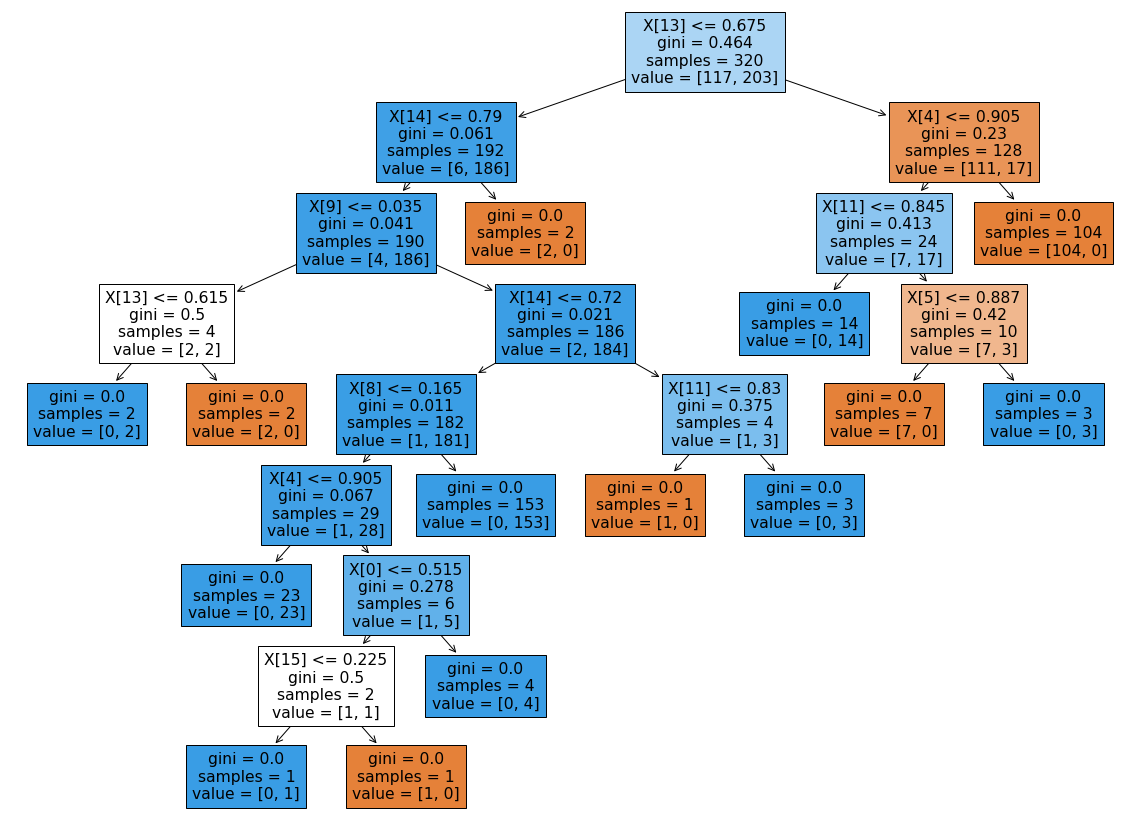

In [41]:
plt.figure(figsize=(20,15))
tree.plot_tree(dtree,filled=True)

### Logistic Regression

In [42]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

0.975

In [43]:
pred_lr=lr.predict(X_test)

#### confusion matrix

In [44]:
print(confusion_matrix(y_test,pred_lr))

[[33  0]
 [ 2 45]]


#### Classification report of Logistic Regression

In [45]:
print(classification_report(y_test,pred_lr))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97        33
           1       1.00      0.96      0.98        47

    accuracy                           0.97        80
   macro avg       0.97      0.98      0.97        80
weighted avg       0.98      0.97      0.98        80



### KNeighborsClassifier

In [46]:
from sklearn.neighbors import KNeighborsClassifier


KnnClassifier = KNeighborsClassifier(n_neighbors=65, metric='euclidean')
KnnClassifier.fit(X_train,y_train)
prediction=KnnClassifier.score(X_test, y_test)

In [47]:
pred_knn=KnnClassifier.predict(X_test)

#### confusion matrix

In [48]:
print(confusion_matrix(y_test,pred_knn))

[[33  0]
 [ 9 38]]


#### Classification report of KNeighborsClassifier

In [50]:
print(classification_report(y_test,pred_knn))

              precision    recall  f1-score   support

           0       0.79      1.00      0.88        33
           1       1.00      0.81      0.89        47

    accuracy                           0.89        80
   macro avg       0.89      0.90      0.89        80
weighted avg       0.91      0.89      0.89        80



### Support Vector Machine

In [51]:
from sklearn.svm import SVC

svm = SVC(probability= True)
svm.fit(X_train, y_train)
svm.score(X_test, y_test)

0.9375

In [52]:
pred_svm=svm.predict(X_test)

#### confusion matrix

In [53]:
print(confusion_matrix(y_test,pred_svm))

[[33  0]
 [ 5 42]]


#### Classification report of svm

In [54]:
print(classification_report(y_test,pred_svm))

              precision    recall  f1-score   support

           0       0.87      1.00      0.93        33
           1       1.00      0.89      0.94        47

    accuracy                           0.94        80
   macro avg       0.93      0.95      0.94        80
weighted avg       0.95      0.94      0.94        80



### RandomForestClassifier

In [55]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators = 40)
rf.fit(X_train, y_train)
rf.score(X_test, y_test)


0.9875

In [56]:
pred_rf=rf.predict(X_test)

#### confusion matrix

In [57]:
print(confusion_matrix(y_test,pred_rf))

[[33  0]
 [ 1 46]]


#### Classification report of RandomForestClassifier

In [58]:
print(classification_report(y_test,pred_rf))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99        33
           1       1.00      0.98      0.99        47

    accuracy                           0.99        80
   macro avg       0.99      0.99      0.99        80
weighted avg       0.99      0.99      0.99        80



# Using K-Fold


In [59]:
from sklearn.model_selection import KFold
kf = KFold(n_splits = 10)
kf

KFold(n_splits=10, random_state=None, shuffle=False)

In [60]:
for train_index, test_index in kf.split([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24]):
    print(train_index, test_index)

[ 3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23] [0 1 2]
[ 0  1  2  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23] [3 4 5]
[ 0  1  2  3  4  5  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23] [6 7 8]
[ 0  1  2  3  4  5  6  7  8 12 13 14 15 16 17 18 19 20 21 22 23] [ 9 10 11]
[ 0  1  2  3  4  5  6  7  8  9 10 11 14 15 16 17 18 19 20 21 22 23] [12 13]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 16 17 18 19 20 21 22 23] [14 15]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 18 19 20 21 22 23] [16 17]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 20 21 22 23] [18 19]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 22 23] [20 21]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21] [22 23]


In [61]:
def get_score(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    return model.score(X_test, y_test)

In [65]:
from numpy import mean, std
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
folds = StratifiedKFold(n_splits = 10)

def models(X_train, y_train,scoring, cv):

    scoresLR = cross_val_score(LogisticRegression(), X, y, scoring = scoring, cv = cv, n_jobs = 1)
    print(' for Logistic Regression Model: %.3f (%.3f)' % (mean(scoresLR), std(scoresLR)))
    
    scoresRF = cross_val_score(RandomForestClassifier(n_estimators = 40), X, y, scoring = scoring, cv = cv, n_jobs = 1)
    print(' for Random Forest Model: %.3f (%.3f)' % (mean(scoresRF), std(scoresRF)))

    scoresSV = cross_val_score(SVC(), X, y, scoring = scoring, cv = cv, n_jobs = 1)
    print(' for SVM Model: %.3f (%.3f)' % (mean(scoresSV), std(scoresSV)))

    scoresKNN = cross_val_score(KNeighborsClassifier(n_neighbors = 5, metric = 'euclidean'), X, y, scoring = scoring, cv = cv, n_jobs = 1)
    print(' for KNN Model: %.3f (%.3f)' % (mean(scoresKNN), std(scoresKNN)))

    scoresDtree= cross_val_score(DecisionTreeClassifier(max_depth= 10, criterion='gini'), X, y, scoring = scoring, cv = cv, n_jobs = 1)
    print(' for Decision Tree Model: %.3f (%.3f)' % (mean(scoresDtree), std(scoresDtree)))
    

In [66]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [68]:
cv= StratifiedKFold(n_splits=10, random_state=1, shuffle = True)

print ('\n Accuracy: \n')
models(X_train, y_train, 'accuracy', cv)

print ('\n Precision: \n')
models(X_train, y_train, 'precision', cv)

print ('\n Recall: \n')
models(X_train, y_train, 'recall', cv)

print ('\n F-measure: \n')
models(X_train, y_train, 'f1', cv)

print ('\nROC: \n')
models(X_train, y_train, 'roc_auc', cv)



 Accuracy: 

 for Logistic Regression Model: 0.975 (0.016)
 for Random Forest Model: 0.990 (0.017)
 for SVM Model: 0.927 (0.034)
 for KNN Model: 0.948 (0.036)
 for Decision Tree Model: 0.948 (0.031)

 Precision: 

 for Logistic Regression Model: 1.000 (0.000)
 for Random Forest Model: 0.992 (0.015)
 for SVM Model: 1.000 (0.000)
 for KNN Model: 1.000 (0.000)
 for Decision Tree Model: 0.969 (0.029)

 Recall: 

 for Logistic Regression Model: 0.960 (0.025)
 for Random Forest Model: 0.996 (0.012)
 for SVM Model: 0.884 (0.055)
 for KNN Model: 0.916 (0.058)
 for Decision Tree Model: 0.956 (0.061)

 F-measure: 

 for Logistic Regression Model: 0.979 (0.013)
 for Random Forest Model: 0.992 (0.013)
 for SVM Model: 0.938 (0.031)
 for KNN Model: 0.955 (0.032)
 for Decision Tree Model: 0.951 (0.025)

ROC: 

 for Logistic Regression Model: 0.997 (0.006)
 for Random Forest Model: 1.000 (0.001)
 for SVM Model: 0.996 (0.007)
 for KNN Model: 0.985 (0.009)
 for Decision Tree Model: 0.942 (0.034)


Logistic: ROC AUC=0.996
dtree: ROC AUC=0.968
knn: ROC AUC=0.994
rf: ROC AUC=1.000
svm: ROC AUC=0.996


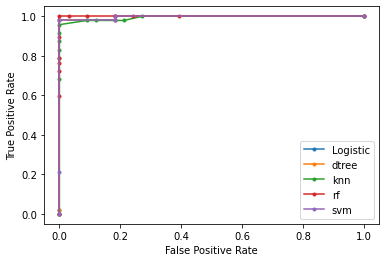

In [103]:
lr_probs=lr.predict_proba(X_test)
lr_probs=lr_probs[:,1]
lr_auc = roc_auc_score(y_test, lr_probs)

print('Logistic: ROC AUC=%.3f' % (lr_auc))

lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')






dtree_probs=dtree.predict_proba(X_test)
dtree_probs=dtree_probs[:,1]
dtree_auc = roc_auc_score(y_test, dtree_probs)

print('dtree: ROC AUC=%.3f' % (dtree_auc))

dtree_fpr, dtree_tpr, _ =  roc_curve(y_test, lr_probs)

plt.plot(dtree_fpr, dtree_tpr, marker='.', label='dtree')



knn_probs=knn.predict_proba(X_test)
knn_probs=knn_probs[:,1]
knn_auc = roc_auc_score(y_test, knn_probs)

print('knn: ROC AUC=%.3f' % (knn_auc))

knn_fpr, knn_tpr, _ = roc_curve(y_test, knn_probs)
plt.plot(knn_fpr, knn_tpr, marker='.', label='knn')




rf_probs=rf.predict_proba(X_test)
rf_probs=rf_probs[:,1]
rf_auc = roc_auc_score(y_test, rf_probs)

print('rf: ROC AUC=%.3f' % (rf_auc))

rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)
plt.plot(rf_fpr, rf_tpr, marker='.', label='rf')







svm_probs=svm.predict_proba(X_test)
svm_probs=svm_probs[:,1]
svm_auc = roc_auc_score(y_test, svm_probs)



print('svm: ROC AUC=%.3f' % (svm_auc))

svm_fpr, svm_tpr, _ = roc_curve(y_test, svm_probs)
plt.plot(svm_fpr, svm_tpr, marker='.', label='svm')





# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

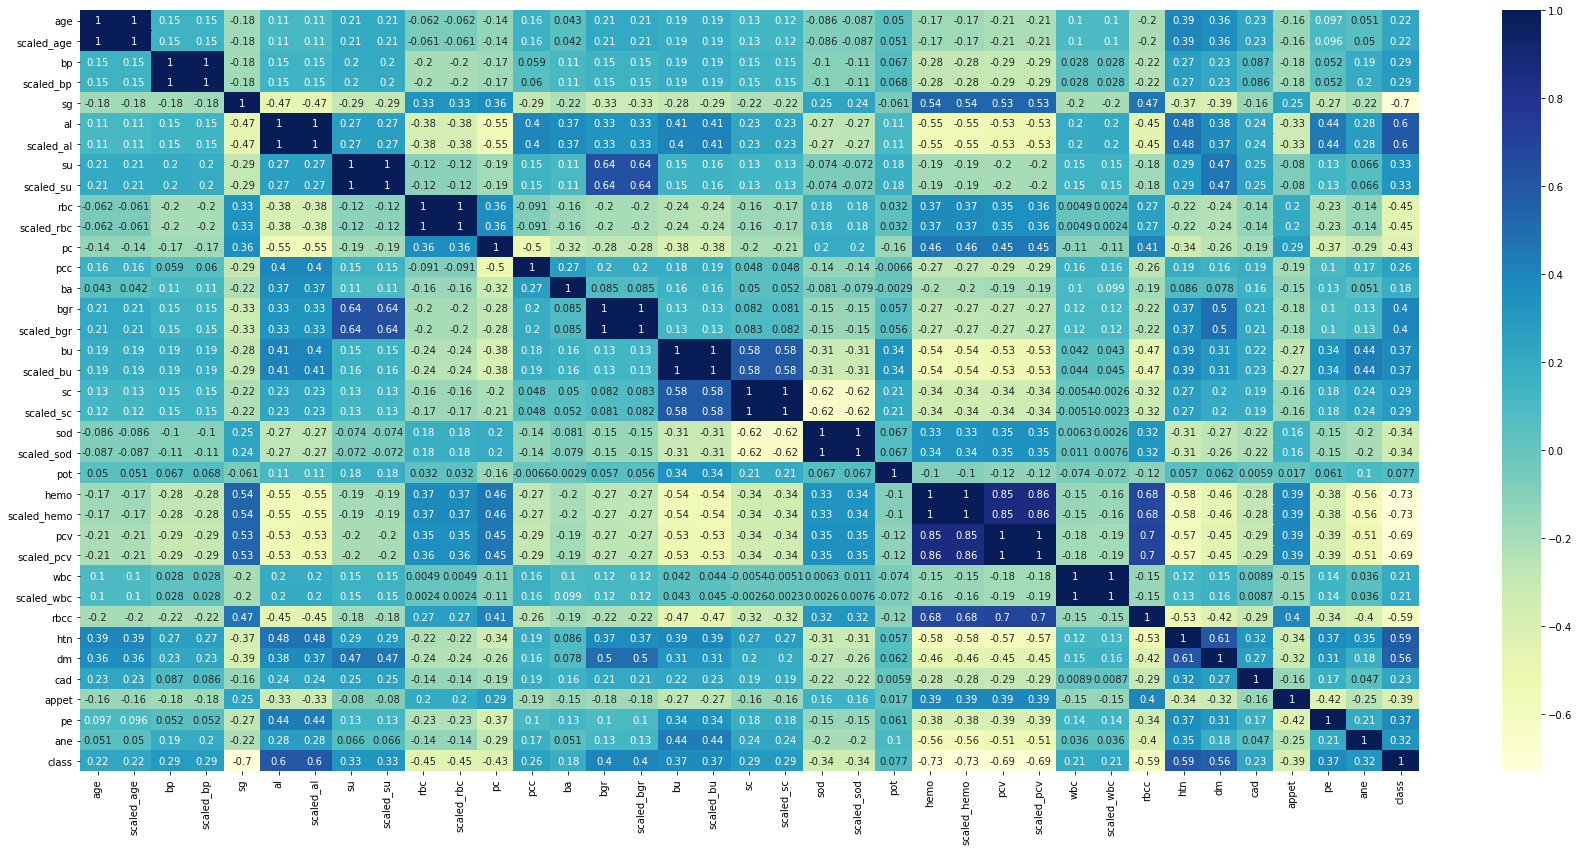

In [101]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt 
plt.figure(figsize = (30,14))
sns.heatmap(df.corr(), cmap = 'YlGnBu', annot = True)
plt.show()

# KFOLD and ROC CURVE Rough (NOT FINALIZED)


# KNN


In [71]:

accuracy_rate=[]
for i in range(1,5):    
    knn = KNeighborsClassifier(n_neighbors=i)
    score=cross_val_score(knn,X,y, cv=10)
    accuracy_rate.append(score.mean())

In [72]:
error_rate = []


for i in range(1,5):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    score=cross_val_score(knn,X,y, cv=10)
    error_rate.append(1-score.mean())

Text(0, 0.5, 'Error Rate')

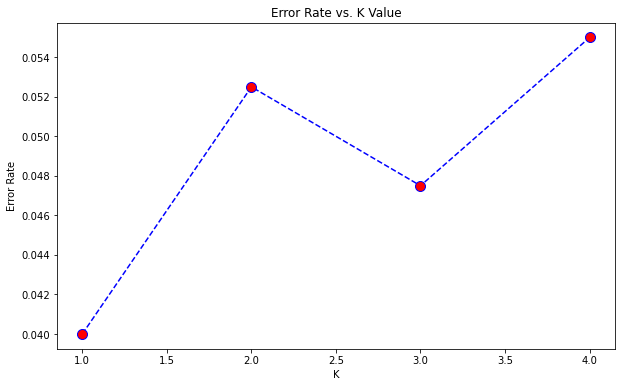

In [73]:
plt.figure(figsize=(10,6))
plt.plot(range(1,5),error_rate,color='blue', linestyle='dashed', marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

Text(0, 0.5, 'Accuracy')

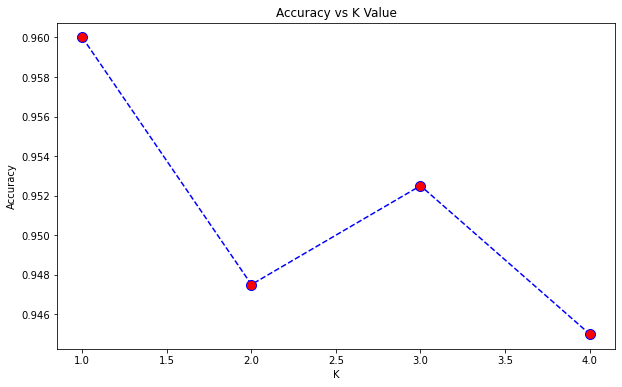

In [74]:
plt.figure(figsize = (10,6))
plt.plot(range(1,5),accuracy_rate,color='blue', linestyle='dashed', marker='o',markerfacecolor='red', markersize=10)
plt.title('Accuracy vs K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')

In [76]:
knn = KNeighborsClassifier(n_neighbors=17,metric="euclidean")
knn.fit(X,y)
pred = knn.predict(X)

In [77]:
print(classification_report(y,pred))
print(confusion_matrix(y,pred))

              precision    recall  f1-score   support

           0       0.86      0.99      0.92       150
           1       1.00      0.90      0.95       250

    accuracy                           0.94       400
   macro avg       0.93      0.95      0.93       400
weighted avg       0.94      0.94      0.94       400

[[149   1]
 [ 25 225]]


In [78]:
y_pred_prob = knn.predict_proba(X)[:,1]
print(roc_auc_score(y,y_pred_prob))


0.9947733333333333


# Decision Tree

In [79]:
accuracy_rate=[]
for i in range(1,30):    
    dt = DecisionTreeClassifier(max_depth=i, criterion='gini')
    score=cross_val_score(dt,X,y, cv=10)
    accuracy_rate.append(score.mean())

In [80]:
error_rate = []

for i in range(1,30):
    
    dt = DecisionTreeClassifier(max_depth=i, criterion='gini')
    score=cross_val_score(dt,X,y, cv=10)
    error_rate.append(1-score.mean())

Text(0, 0.5, 'Error Rate')

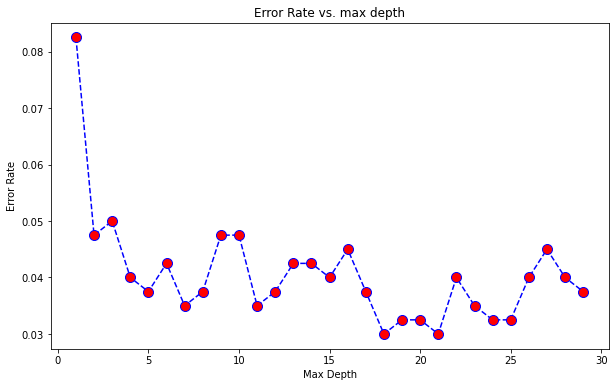

In [81]:
plt.figure(figsize=(10,6))
plt.plot(range(1,30),error_rate,color='blue', linestyle='dashed', marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. max depth')
plt.xlabel('Max Depth')
plt.ylabel('Error Rate')

Text(0, 0.5, 'Accuracy')

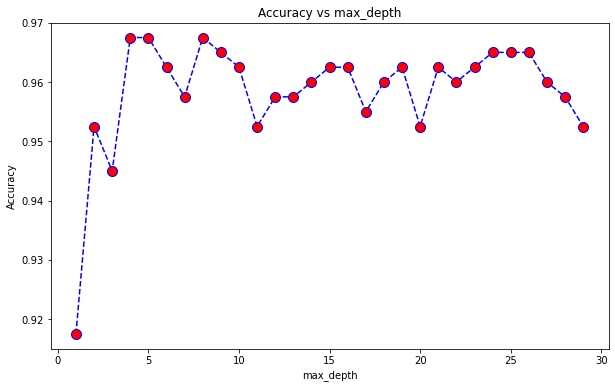

In [82]:
plt.figure(figsize = (10,6))
plt.plot(range(1,30),accuracy_rate,color='blue', linestyle='dashed', marker='o',markerfacecolor='red', markersize=10)
plt.title('Accuracy vs max_depth')
plt.xlabel('max_depth')
plt.ylabel('Accuracy')

In [83]:
dt = DecisionTreeClassifier(max_depth=3,criterion = "gini")
dt.fit(X,y)
pred = dt.predict(X)

In [84]:
print(classification_report(y,pred))
print(confusion_matrix(y,pred))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       150
           1       0.98      0.98      0.98       250

    accuracy                           0.98       400
   macro avg       0.98      0.98      0.98       400
weighted avg       0.98      0.98      0.98       400

[[146   4]
 [  4 246]]


In [85]:
y_pred_prob = dt.predict_proba(X)[:,1]
print(roc_auc_score(y,y_pred_prob))

0.9928533333333334


#  Logistic Regression Model


In [86]:
accuracy_rate=[]
for i in range(1,30):    
    dt = LogisticRegression(C= i, solver='liblinear', random_state=0)
    score=cross_val_score(dt,X_train,y_train, cv=10)
    accuracy_rate.append(score.mean())
    
    scoresLR = cross_val_score(LogisticRegression(), X, y, scoring = 'accuracy', cv = cv, n_jobs = 1)
print('Accuracy for Logistic Regression Model: %.3f (%.3f)' % (mean(scoresLR), std(scoresLR)))

Accuracy for Logistic Regression Model: 0.975 (0.016)


In [87]:
error_rate = []

for i in range(1,30):
    
    dt = LogisticRegression(C= i, solver='liblinear', random_state=0)
    score=cross_val_score(dt,X_train,y_train, cv=10)
    error_rate.append(1-score.mean())

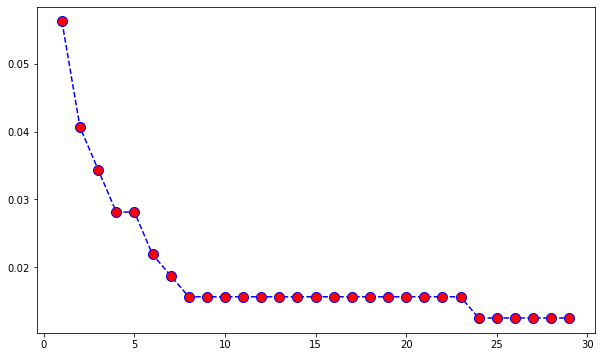

In [88]:
plt.figure(figsize=(10,6))
plt.plot(range(1,30),error_rate,color='blue', linestyle='dashed', marker='o',markerfacecolor='red', markersize=10)


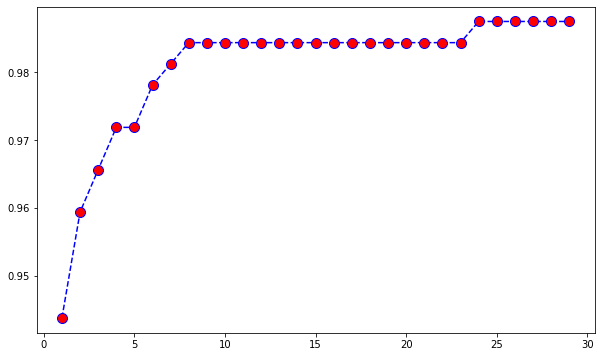

In [89]:
plt.figure(figsize = (10,6))
plt.plot(range(1,30),accuracy_rate,color='blue', linestyle='dashed', marker='o',markerfacecolor='red', markersize=10)


In [90]:
dt = LogisticRegression(solver='liblinear', random_state=0)
dt.fit(X_train,y_train)
pred = dt.predict(X_test)

In [91]:
print(classification_report(y_test,pred))
print(confusion_matrix(y_test,pred))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96        33
           1       1.00      0.94      0.97        47

    accuracy                           0.96        80
   macro avg       0.96      0.97      0.96        80
weighted avg       0.97      0.96      0.96        80

[[33  0]
 [ 3 44]]


In [92]:
y_pred_prob = dt.predict_proba(X_test)[:,1]
print(roc_auc_score(y_test,y_pred_prob))

0.9909735654416505


# Feature Selection using RFE

In [93]:
from sklearn.feature_selection import RFE
from sklearn.svm import SVR
estimator = SVR(kernel = 'linear')
selector = RFE(estimator, n_features_to_select=8, step=1)
selector = selector.fit(X, y)

In [94]:
print("Num Features: %d" % selector.n_features_)
print("Selected Features: %s" % selector.support_)
print("Feature Ranking: %s" % selector.ranking_)

Num Features: 8
Selected Features: [False  True  True False  True False False False False  True  True False
 False  True  True False False False  True False False False False]
Feature Ranking: [ 9  1  1  8  1 15 16 13  2  1  1  5 14  1  1  3 10  4  1  7 11 12  6]


In [95]:
X.head()

scaled_age  scaled_bp  scaled_al  scaled_su  scaled_rbc   pc  pcc   ba  \
0        0.66       0.08        0.0        0.0        1.00  1.0  0.0  0.0   
1        0.36       0.31        0.4        0.0        1.00  1.0  0.0  0.0   
2        0.69       0.31        0.0        0.0        0.81  1.0  0.0  0.0   
3        0.57       0.23        0.0        0.0        1.00  1.0  0.0  0.0   
4        0.52       0.23        0.2        0.0        0.81  1.0  0.0  0.0   

   scaled_bgr  scaled_bu  ...  scaled_hemo  scaled_pcv  scaled_wbc   rbcc  \
0        0.24       0.11  ...         0.76        0.87        0.35  5.600   
1        0.18       0.12  ...         0.60        0.67        0.26  4.707   
2        0.22       0.04  ...         0.59        0.56        0.38  4.700   
3        0.16       0.06  ...         0.81        0.96        0.17  5.300   
4        0.21       0.09  ...         0.84        0.78        0.23  5.200   

   htn   dm  cad  appet   pe  ane  
0  0.0  0.0  0.0    1.0  0.0  0.0  
1  0.0  0.0  0.0    1.0  0.0  0.0  
2  0.0  0.0  0.0    1.0  0.0  0.0  
3  0.0  0.0  0.0    1.0  0.0  0.0  
4  1.0  1.0  0.0    1.0  0.0  0.0  

[5 rows x 23 columns]

In [97]:
df_rfe= new_df.iloc[:, [1,2,4,9, 10,13,14,18]]

df_rfe.head()

scaled_bp  scaled_al  scaled_rbc  scaled_bu  scaled_sc  scaled_hemo  \
0       0.08        0.0        1.00       0.11       0.00         0.76   
1       0.31        0.4        1.00       0.12       0.02         0.60   
2       0.31        0.0        0.81       0.04       0.02         0.59   
3       0.23        0.0        1.00       0.06       0.01         0.81   
4       0.23        0.2        0.81       0.09       0.01         0.84   

   scaled_pcv   dm  
0        0.87  0.0  
1        0.67  0.0  
2        0.56  0.0  
3        0.96  0.0  
4        0.78  1.0

In [98]:
X_rfe = df_rfe
y_rfe = df['class']

folds = StratifiedKFold(n_splits = 3)
cv = StratifiedKFold(n_splits = 3, random_state = 1, shuffle = True)
scoresLR = cross_val_score(LogisticRegression(), df_rfe, y_rfe, scoring = 'accuracy', cv = cv, n_jobs = 1)
print('Accuracy for Logistic Regression Model: %.3f (%.3f)' % (mean(scoresLR), std(scoresLR)))

scoresRF = cross_val_score(RandomForestClassifier(n_estimators = 40), df_rfe, y_rfe, scoring = 'accuracy', cv = cv, n_jobs = 1)
print('Accuracy for Random Forest Model: %.3f (%.3f)' % (mean(scoresRF), std(scoresRF)))

scoresSV = cross_val_score(SVC(), df_rfe, y_rfe, scoring = 'accuracy', cv = cv, n_jobs = 1)
print('Accuracy for SVM Model: %.3f (%.3f)' % (mean(scoresSV), std(scoresSV)))

scoresKNN = cross_val_score(KNeighborsClassifier(n_neighbors = 5, metric = 'euclidean'), df_rfe, y_rfe, scoring = 'accuracy', cv = cv, n_jobs = 1)
print('Accuracy for KNN Model: %.3f (%.3f)' % (mean(scoresKNN), std(scoresKNN)))

scoresDtree= cross_val_score(DecisionTreeClassifier(max_depth= 10, criterion='gini'), df_rfe, y_rfe, scoring = 'accuracy', cv = cv, n_jobs = 1)
print('Accuracy for Decision Tree Model: %.3f (%.3f)' % (mean(scoresDtree), std(scoresDtree)))


Accuracy for Logistic Regression Model: 0.980 (0.004)
Accuracy for Random Forest Model: 0.990 (0.009)
Accuracy for SVM Model: 0.993 (0.006)
Accuracy for KNN Model: 0.995 (0.004)
Accuracy for Decision Tree Model: 0.965 (0.023)


# Feature Selection using kbest

In [104]:
from sklearn.feature_selection import SelectKBest

In [105]:
from sklearn.feature_selection import f_classif

In [106]:
FitFeatures = SelectKBest(score_func=f_classif)

In [107]:
FitFeatures.fit(X,y)

SelectKBest()

In [108]:
X_Col= pd.DataFrame(FitFeatures.scores_, columns=['Score_Val'])

In [109]:
X_Col

Score_Val
0    21.040938
1    36.481331
2   222.004808
3    47.915659
4    99.683904
5    90.809601
6    29.094993
7    13.908227
8    76.201572
9    64.957995
10   37.873733
11   51.808349
12    2.368173
13  453.367717
14  367.436565
15   18.403571
16  213.660166
17  208.532433
18  177.264298
19   23.091929
20   72.184243
21   64.603744
22   46.716737

In [110]:
Name_col = pd.DataFrame(X.columns)

In [111]:
top_features = pd.concat([Name_col, X_Col], axis=1)

In [112]:
top_features.nlargest(10, X_Col)

0   Score_Val
13  scaled_hemo  453.367717
14   scaled_pcv  367.436565
2     scaled_al  222.004808
16         rbcc  213.660166
17          htn  208.532433
18           dm  177.264298
4    scaled_rbc   99.683904
5            pc   90.809601
8    scaled_bgr   76.201572
20        appet   72.184243

# Feature Importance


In [113]:
from sklearn.ensemble import ExtraTreesClassifier

In [114]:
model = ExtraTreesClassifier()

In [115]:
model.fit(X,y)

ExtraTreesClassifier()

In [116]:
model.feature_importances_

array([0.00858603, 0.01622959, 0.10179864, 0.01484808, 0.11330169,
       0.04698267, 0.00867137, 0.00311892, 0.01535373, 0.01108694,
       0.01962801, 0.01269153, 0.00649511, 0.12748451, 0.10451168,
       0.00640035, 0.05370462, 0.1303349 , 0.10705502, 0.00473227,
       0.04830103, 0.0267141 , 0.01196923])

In [117]:
top = pd.Series(model.feature_importances_, index= X.columns)

In [118]:
top

scaled_age     0.008586
scaled_bp      0.016230
scaled_al      0.101799
scaled_su      0.014848
scaled_rbc     0.113302
pc             0.046983
pcc            0.008671
ba             0.003119
scaled_bgr     0.015354
scaled_bu      0.011087
scaled_sc      0.019628
scaled_sod     0.012692
pot            0.006495
scaled_hemo    0.127485
scaled_pcv     0.104512
scaled_wbc     0.006400
rbcc           0.053705
htn            0.130335
dm             0.107055
cad            0.004732
appet          0.048301
pe             0.026714
ane            0.011969
dtype: float64

<AxesSubplot:>

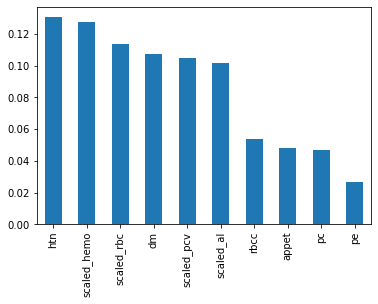

In [119]:
top.nlargest(10).plot(kind='bar')

# Comparison with the price range for the best features 

In [155]:


a_dictionary = {"Blood Test": 220, "PC": 200, "Albumin": 250, "Diabetes Mellitus": 5900} #(Blood Test= Hemoglobin, PCV, RBC, RBCC)
keys = a_dictionary.keys()
values = a_dictionary.values()

plt.yticks(rotation=90)
plt.bar(keys, values)

AttributeError: 'dict' object has no attribute 'yticks'